In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [7]:
print("Backend Used : {} , Keras Version : {}".format(keras.backend.backend(), keras.__version__))

Backend Used : tensorflow , Keras Version : 2.2.4


Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
0    ->  T-shirt/top
1    ->  Trouser
2    ->  Pullover
3    ->  Dress
4    ->  Coat
5    ->  Sandal
6    ->  Shirt
7    ->  Sneaker
8    ->  Bag
9    ->  Ankle boot

In [8]:
fashion_data = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_data.load_data()

Returns 2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [80]:
# get shape of x_train and x_test
print("shape of X_train : {} and shape of y_train: {}".format(X_train.shape, y_train.shape))

shape of X_train : (60000, 28, 28) and shape of y_train: (60000,)


X_train is 2D array and y_train is 1D array.

In [9]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [10]:
y_train[1]

0

In [11]:
fashion_categories = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [12]:
def displayFashionItem(fashionItem,para):
    if para == 'train':
        print(fashion_categories[y_train[fashionItem]])
        plt.matshow(X_train[fashionItem])
    else:
        print(fashion_categories[y_test[fashionItem]])
        plt.matshow(X_test[fashionItem])

Dress
Dress
Sneaker


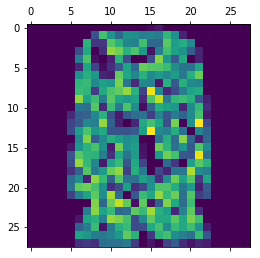

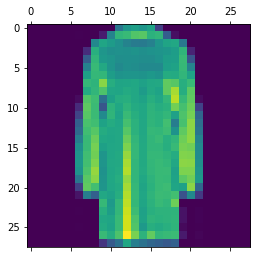

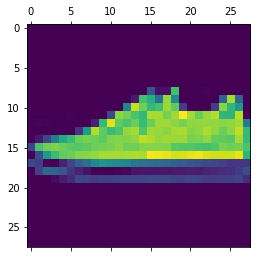

In [13]:
# let show few random image of fashion
import random
for i in np.arange(0,3):
    displayFashionItem(random.randrange(0,6000),'train')

In [14]:
# The final preprocessing step for the input data is to normalize our data values to the range [0, 1].
X_train = X_train/255
X_test = X_test/255

In [15]:
# lets verify this normalization
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

Keras Sequential model

In [16]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [17]:
model = Sequential()
# Pass an input_shape argument to the first layer
# this converts our 2D feature maps to 1D feature vectors

model.add(Flatten(input_shape=[28, 28]))
# 100 2D Hidden layers, such as Dense
# In a neural network, the activation function is responsible for transforming 
# the summed weighted input from the node into the activation of the node or output for that input.
# The function returns 0 if it receives any negative input, but for any positive value x
# it returns that value back. So it can be written as f(x)=max(0,x)
model.add(Dense(100, activation="relu"))

# 10 output label
#  Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# get summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Our targets is  integer targets
# A loss function (or objective function, or optimization score function) is one of the three parameters required to compile a model:
# adaptive moment estimation
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [20]:
model.fit(X_train, y_train)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 8s 137us/step - loss: 0.5080 - acc: 0.8219


In [21]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 59us/step


[0.4728849052667618, 0.8292]

Accuracy = 0.82 and Loss = 0.4728

In [22]:
predicted_y = model.predict(X_test)

In [23]:
# predicted_y list contain probalities of all 10 labels but max prob is the output
predicted_y[4]

array([7.2222836e-02, 2.4693229e-03, 2.4012712e-01, 2.0627042e-02,
       1.8135160e-01, 7.4609699e-05, 4.7752076e-01, 3.4979751e-06,
       5.5838055e-03, 1.9434687e-05], dtype=float32)

In [24]:
np.argmax(predicted_y[4])

6

Shirt


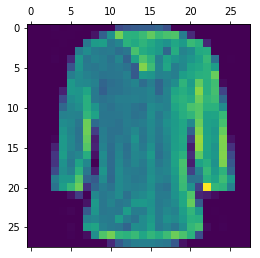

In [25]:
# get the label name and image
displayFashionItem(4,'test')